In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [ ]:
df = pd.read_csv('exp.csv', index_col=0)
df.head(5)

,id,title,time_type_full_or_part,duration_of_cooperation,location_hybrid,company_url,company_name
0,1,Search Engine Optimization Specialist,Pixune · Freelance,Jul 2022 - Present · 2 yrs 1 mo,Poland · Remote,https://www.linkedin.com/search/results/all/?k...,NaN
1,2,Search Engine Optimization Manager,Cofinfo · Self-employed,Dec 2022 - Present · 1 yr 8 mos,NaN,https://www.linkedin.com/search/results/all/?k...,NaN
2,3,Search Engine Optimization Specialist,Karnakon · Full-time,Dec 2020 - Aug 2022 · 1 yr 9 mos,"Tehran, Iran",https://www.linkedin.com/search/results/all/?k...,NaN
3,4,Trader,Forex Trading Online · Apprenticeship,Apr 2020 - Present · 4 yrs 4 mos,NaN,https://www.linkedin.com/company/18372839/,Forex Trading Online
4,5,In personal marketing,Home Design Decoration ideas · Part-time,Jan 2018 - Present · 6 yrs 7 mos,"Shiraz County, Fars, Iran",https://www.linkedin.com/company/13660967/,Home Design Decoration ideas


In [ ]:
print("First 5 samples:")
print(df.head())

# Display the structure of the dataset (columns and their data types)
print("\nDataset structure:")
print(df.info())

# Display summary statistics (useful for numeric columns)
print("\nSummary statistics:")
print(df.describe(include='all'))


First 5 samples:
   id                                  title  \
0   1  Search Engine Optimization Specialist   
1   2     Search Engine Optimization Manager   
2   3  Search Engine Optimization Specialist   
3   4                                 Trader   
4   5                  In personal marketing   

                     time_type_full_or_part           duration_of_cooperation  \
0                        Pixune · Freelance   Jul 2022 - Present · 2 yrs 1 mo   
1                   Cofinfo · Self-employed   Dec 2022 - Present · 1 yr 8 mos   
2                      Karnakon · Full-time  Dec 2020 - Aug 2022 · 1 yr 9 mos   
3     Forex Trading Online · Apprenticeship  Apr 2020 - Present · 4 yrs 4 mos   
4  Home Design Decoration ideas · Part-time  Jan 2018 - Present · 6 yrs 7 mos   

             location_hybrid  \
0            Poland · Remote   
1                        NaN   
2               Tehran, Iran   
3                        NaN   
4  Shiraz County, Fars, Iran   

              

In [ ]:
df['duration_of_cooperation'] = df['duration_of_cooperation'].apply(lambda x: x if ' - ' in str(x) else np.nan)

missing_data = df.isnull().sum()

missing_columns = missing_data[missing_data > 0]
print("ستون‌های دارای مقادیر گمشده و تعداد آن‌ها:")
print(missing_columns)


ستون‌های دارای مقادیر گمشده و تعداد آن‌ها:
title                         5
time_type_full_or_part       19
duration_of_cooperation    1339
location_hybrid            3221
company_url                  41
company_name               3282
dtype: int64


In [ ]:
# Fill missing numeric values with mean, and text data with mode
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)
print(df.mode().iloc[0])
df.fillna(df.mode().iloc[0], inplace=True)

id                                                                         1
title                                                       Graphic Designer
time_type_full_or_part                                             Freelance
duration_of_cooperation                           Dec 2023 - Present · 8 mos
location_hybrid                                                 Tehran, Iran
company_url                https://www.linkedin.com/search/results/all/?k...
company_name                                                           TAPSI
Name: 0, dtype: object


In [ ]:
df.dropna(inplace=True)

In [ ]:
print("داده‌های پاک‌سازی شده:")
print("Dataset structure:")
print(df.info())

داده‌های پاک‌سازی شده:
Dataset structure:
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10000 non-null  int64 
 1   title                    10000 non-null  object
 2   time_type_full_or_part   10000 non-null  object
 3   duration_of_cooperation  10000 non-null  object
 4   location_hybrid          10000 non-null  object
 5   company_url              10000 non-null  object
 6   company_name             10000 non-null  object
dtypes: int64(1), object(6)
memory usage: 625.0+ KB
None


In [ ]:
def extract_duration_in_months(value):
    if pd.isnull(value):
        return np.nan

    match_years_months = re.search(r'(\d+)\s*yrs?\s*(\d+)?\s*mos?', value)  # الگوی ترکیب سال و ماه
    match_years = re.search(r'(\d+)\s*yrs?', value)  # فقط سال‌ها
    match_months = re.search(r'(\d+)\s*mos?', value)  # فقط ماه‌ها

    if match_years_months:
        years = int(match_years_months.group(1))
        months = int(match_years_months.group(2)) if match_years_months.group(2) else 0
        return years * 12 + months

    elif match_years:
        years = int(match_years.group(1))
        return years * 12

    elif match_months:
        months = int(match_months.group(1))
        return months

    return np.nan

df['cooperation_duration_months'] = df['duration_of_cooperation'].apply(extract_duration_in_months)

print(df[['duration_of_cooperation', 'cooperation_duration_months']].head())

            duration_of_cooperation  cooperation_duration_months
0   Jul 2022 - Present · 2 yrs 1 mo                         25.0
1   Dec 2022 - Present · 1 yr 8 mos                         20.0
2  Dec 2020 - Aug 2022 · 1 yr 9 mos                         21.0
3  Apr 2020 - Present · 4 yrs 4 mos                         52.0
4  Jan 2018 - Present · 6 yrs 7 mos                         79.0


In [ ]:
def clean_text(text):
    text = text.lower()

    # حذف کاراکترهای غیرضروری (اعداد، علائم نگارشی و کاراکترهای خاص)
    text = re.sub(r'[^a-z\s]', '', text)

    # حذف فاصله‌های اضافی
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def identify_job_roles(text):
    roles = ['manager', 'analyst', 'engineer', 'consultant', 'developer', 'specialist', 'director']

    for role in roles:
        if role in text:
            return role
    return 'other'

df['cleaned_title'] = df['title'].apply(clean_text)
df['cleaned_company_name'] = df['company_name'].apply(clean_text)

df['job_role'] = df['cleaned_title'].apply(identify_job_roles)

df[['title', 'cleaned_title', 'company_name', 'cleaned_company_name', 'job_role']].head()


,title,cleaned_title,company_name,cleaned_company_name,job_role
0,Search Engine Optimization Specialist,search engine optimization specialist,TAPSI,tapsi,specialist
1,Search Engine Optimization Manager,search engine optimization manager,TAPSI,tapsi,manager
2,Search Engine Optimization Specialist,search engine optimization specialist,TAPSI,tapsi,specialist
3,Trader,trader,Forex Trading Online,forex trading online,other
4,In personal marketing,in personal marketing,Home Design Decoration ideas,home design decoration ideas,other


In [ ]:
# مثال Label Encoding
label_encoder = LabelEncoder()
df['location_encoded'] = label_encoder.fit_transform(df['location_hybrid'])

# مثال One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False)  # استفاده از sparse_output به جای sparse
location_onehot = onehot_encoder.fit_transform(df[['location_hybrid']])

df_onehot = pd.DataFrame(location_onehot, columns=onehot_encoder.get_feature_names_out())
df = pd.concat([df, df_onehot], axis=1)

df[['location_hybrid', 'location_encoded'] + list(df_onehot.columns)].head(15)


,location_hybrid,location_encoded,location_hybrid_ helped me get this job,"location_hybrid_ Dubai, AE",location_hybrid_10 st.Zarandieh Ind Park.Mamounieh.Markazi Province.IRAN,"location_hybrid_7th Floor, Abrisham building, Khaleghian st. , Ostad Moein Ave, Tehran, Iran · On-site",location_hybrid_ADNOC (UAE),"location_hybrid_Aboozar Oil Complex, Kharg Island","location_hybrid_Adelaide, Australia","location_hybrid_Adelaide, South Australia, Australia",...,location_hybrid_ایران,location_hybrid_برج اوران,location_hybrid_تهران,location_hybrid_تهران · On-site,location_hybrid_تهران مجتمع شهید حدادی,location_hybrid_مركز رشد دانشگاه تربيت مدرس,location_hybrid_پارك فناوري پرديس,location_hybrid_پاسداران,location_hybrid_کرج,location_hybrid_گمرک غرب
0,Poland · Remote,368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Tehran, Iran",511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Tehran, Iran",511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Tehran, Iran",511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Shiraz County, Fars, Iran",445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"Shiraz County, Fars, Iran",445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"Tehran, Tehran Province, Iran · On-site",524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,"Tehran, Tehran Province, Iran · On-site",524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"Tehran, Tehran Province, Iran",522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,"Tehran, Tehran, Iran",526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Let's Start with Z-score
# Step 1: Ensure the column is numeric and handle NaN values
df['cooperation_duration_months'] = pd.to_numeric(df['cooperation_duration_months'], errors='coerce')

# Step 2: Drop NaN values before calculating Z-scores
cleaned_df = df.dropna(subset=['cooperation_duration_months']).copy()

# Step 3: Calculate Z-score
cleaned_df.loc[:, 'z_score'] = zscore(cleaned_df['cooperation_duration_months'])

# Step 4: Removing outliers based on Z-score
df_z_filtered = cleaned_df[(cleaned_df['z_score'] < 3) & (cleaned_df['z_score'] > -3)]

# Step 5: Display the number of rows after outlier removal
print(f'Original dataset size: {df.shape[0]}')
print(f'Size after Z-score filtering: {df_z_filtered.shape[0]}')

Q1 = df['cooperation_duration_months'].quantile(0.25)
Q3 = df['cooperation_duration_months'].quantile(0.75)
IQR = Q3 - Q1

# حذف اوت‌لاین‌ها بر اساس IQR
df_iqr_filtered = df[~((df['cooperation_duration_months'] < (Q1 - 1.5 * IQR)) | (df['cooperation_duration_months'] > (Q3 + 1.5 * IQR)))]

print(f'Size after IQR filtering: {df_iqr_filtered.shape[0]}')


Original dataset size: 10000
Size after Z-score filtering: 9734
Size after IQR filtering: 9124


In [ ]:
# نرمال‌سازی Min-Max
min_max_scaler = MinMaxScaler()
df['cooperation_duration_min_max'] = min_max_scaler.fit_transform(df[['cooperation_duration_months']])

# استانداردسازی Z-score
standard_scaler = StandardScaler()
df['cooperation_duration_z_score'] = standard_scaler.fit_transform(df[['cooperation_duration_months']])

df[['cooperation_duration_months', 'cooperation_duration_min_max', 'cooperation_duration_z_score']].head(10)


,cooperation_duration_months,cooperation_duration_min_max,cooperation_duration_z_score
0,25.0,0.065395,-0.076844
1,20.0,0.051771,-0.215591
2,21.0,0.054496,-0.187842
3,52.0,0.138965,0.672390
4,79.0,0.212534,1.421625
5,114.0,0.307902,2.392855
6,19.0,0.049046,-0.243341
7,19.0,0.049046,-0.243341
8,2.0,0.002725,-0.715081
9,19.0,0.049046,-0.243341


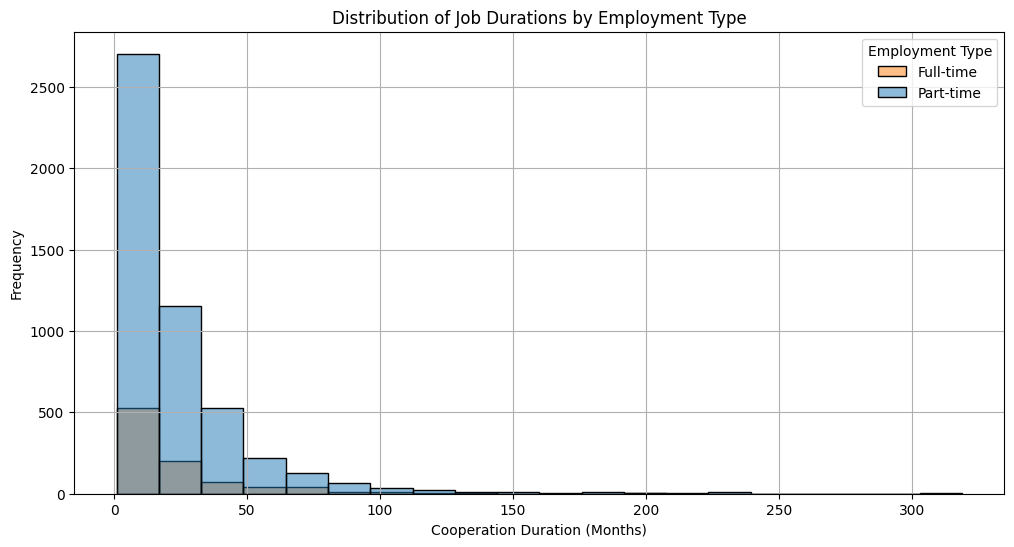

In [ ]:
full_time_jobs = df[df['time_type_full_or_part'].str.contains('Full-time', case=False, na=False)].copy()
part_time_jobs = df[df['time_type_full_or_part'].str.contains('Part-time', case=False, na=False)].copy()

# Create a combined DataFrame for easier plotting
full_time_jobs.loc[:, 'Job Type'] = 'Full-time'
part_time_jobs.loc[:, 'Job Type'] = 'Part-time'
combined_jobs = pd.concat([full_time_jobs[['cooperation_duration_months', 'Job Type']],
                            part_time_jobs[['cooperation_duration_months', 'Job Type']]])

plt.figure(figsize=(12, 6))
hist = sns.histplot(data=combined_jobs, x='cooperation_duration_months', hue='Job Type', bins=20, kde=False)

plt.title('Distribution of Job Durations by Employment Type')
plt.xlabel('Cooperation Duration (Months)')
plt.ylabel('Frequency')

plt.legend(title='Employment Type', labels=['Full-time', 'Part-time'])

plt.grid()
plt.show()
